# Imports

In [1]:
import sys
sys.path.append('/home/usuaris/veu/federico.costa/git_repositories/DoubleAttentionSpeakerVerification/scripts/')

import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Functions

# Settings

In [2]:
audio_paths_file_path = '/home/usuaris/veu/federico.costa/git_repositories/DoubleAttentionSpeakerVerification/feature_extractor/voxceleb_2_dev_feature_extractor_paths.lst'
prepend_directory = '/home/usuaris/veussd/DATABASES/VoxCeleb/VoxCeleb2/dev/'
sampling_rate = 16000
pre_emph_coef = 0.97
n_fft_secs = 0.25
win_length_secs = 0.25
hop_length_secs = 0.01
n_mels = 80
window = 'hamming'

# Analysis

In [3]:
with open(audio_paths_file_path, 'r') as file:
    
    for line in file:
        
        audio_path = line.replace("\n", "")
        load_audio_path = os.path.join(prepend_directory, audio_path)
        
        print(load_audio_path)
        
        samples, sampling_rate = librosa.load(
            f'{load_audio_path}',
            sr = sampling_rate,
            mono = True, # converts to mono channel
            )
        
        samples_mult = samples.copy()
        samples_mult = samples_mult * 32768
        
        samples_pre_emph = samples_mult.copy()
        samples_pre_emph[1:] = samples_pre_emph[1:] - pre_emph_coef * samples_pre_emph[:-1]
        samples_pre_emph[0] *= (1 - pre_emph_coef)
        
        D = librosa.stft(
            samples_pre_emph, 
            n_fft = int(n_fft_secs * sampling_rate), 
            hop_length = int(hop_length_secs * sampling_rate),
            win_length = int(win_length_secs * sampling_rate), 
            window = window, 
            center = False,
            )
        
        magnitudes = np.abs(D)
        low_freq = 0
        high_freq = sampling_rate / 2

        mel_spectrogram = librosa.feature.melspectrogram(
            S = magnitudes, 
            sr = sampling_rate, 
            n_mels = n_mels, 
            fmin = low_freq, 
            fmax = high_freq, 
            norm = None,
            )

        # TODO this array has to be trasposed in later methods. why not traspose now?
        log_mel_spectrogram = np.log(np.maximum(1, mel_spectrogram))
        
        break

/home/usuaris/veussd/DATABASES/VoxCeleb/VoxCeleb2/dev/id06146/jwh1pcIDDyA/00070.m4a


/home/usuaris/veu/federico.costa/.conda/envs/DASV/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [ ]:
df = pd.DataFrame(
    {
        "samples" : samples,
        "samples_mult" : samples_mult,
        "samples_pre_emph" : samples_pre_emph,
    }
)

In [ ]:
df.describe()

In [ ]:
sns.boxplot(data = df)

plt.show()

In [10]:
df_mel = pd.DataFrame(
log_mel_spectrogram[:, :15]
)

In [11]:
df_mel.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,13.891479,13.889566,13.871534,13.821800,13.758583,13.687284,13.624413,13.548643,13.529142,13.530157,13.539874,13.577703,13.633746,13.684044,13.729571
std,1.129513,1.132674,1.118882,1.141905,1.146811,1.134054,1.060990,1.081446,0.994390,0.965186,1.017652,1.054912,1.060965,1.086495,1.115897
min,9.630237,9.652311,9.699253,9.451863,9.263017,9.194390,9.766125,9.394873,10.123422,10.294984,9.844572,9.440587,9.577985,9.567701,9.439440
25%,13.457602,13.453295,13.405770,13.347295,13.284709,13.210565,13.141813,13.042589,12.967695,12.976206,13.065787,13.146067,13.232204,13.317942,13.361830
50%,14.006713,13.992617,13.949461,13.930408,13.824569,13.795248,13.706072,13.665334,13.653856,13.672727,13.767393,13.863396,13.855525,13.809958,13.882913
75%,14.594108,14.597047,14.575496,14.527801,14.442739,14.350665,14.304807,14.189538,14.184083,14.244642,14.217677,14.167117,14.225719,14.343782,14.391759
max,15.686832,15.658797,15.602337,15.561824,15.532933,15.474555,15.386589,15.267126,15.115273,15.087702,15.309444,15.497602,15.653160,15.777116,15.871642


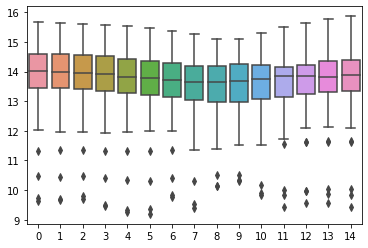

In [12]:
sns.boxplot(data = df_mel)

plt.show()

In [43]:
features = np.transpose(log_mel_spectrogram)
mean = np.mean(features, axis = 0)
features = features - mean

In [39]:
std = np.std(features, axis = 0)
std = np.where(std > 0.01, std, 1.0)
features_std = features / std

In [45]:
features_norm = features_std / np.max(np.abs(features_std),axis=0)

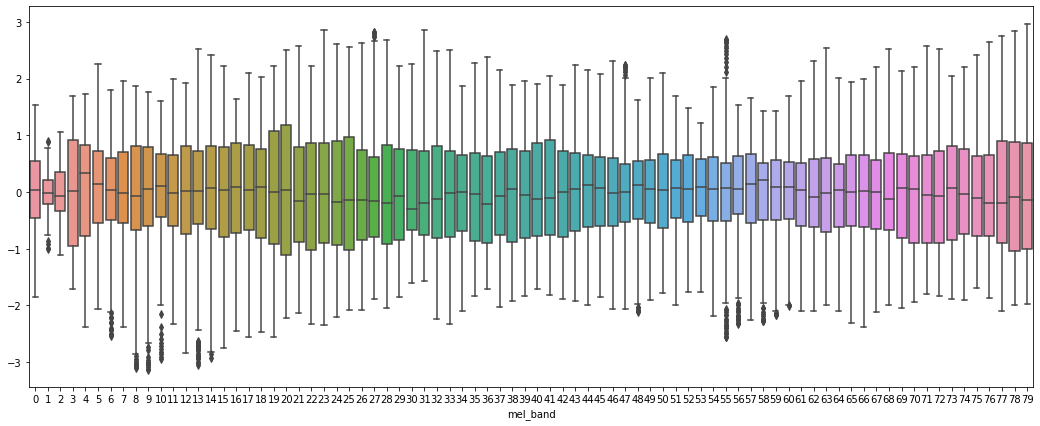

In [35]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features[:, :90]))

plt.xlabel("mel_band")

plt.show()

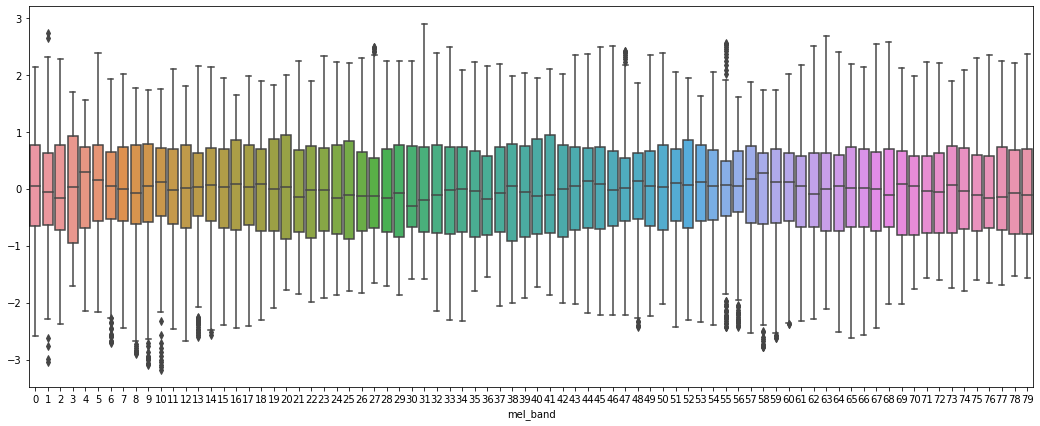

In [40]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features_std[:, :90]))

plt.xlabel("mel_band")

plt.show()

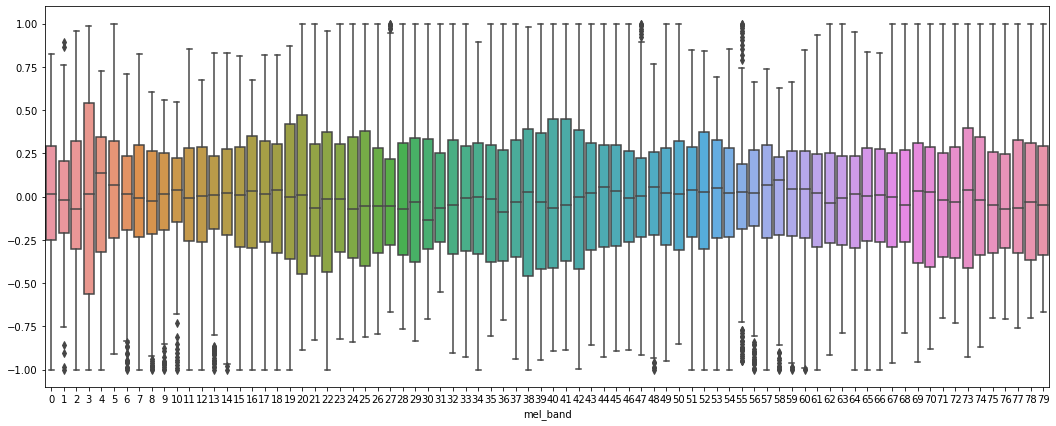

In [46]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features_norm[:, :90]))

plt.xlabel("mel_band")

plt.show()

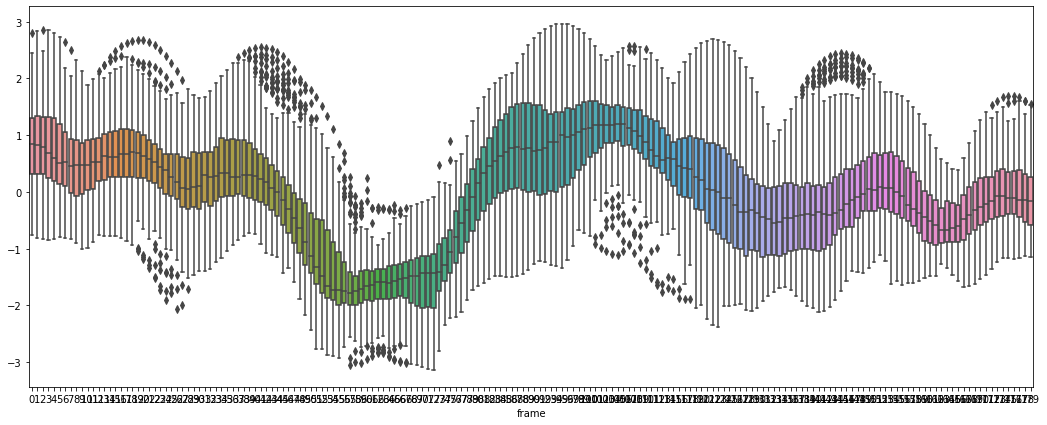

In [38]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features.T[:, :180]))

plt.xlabel("frame")

plt.show()

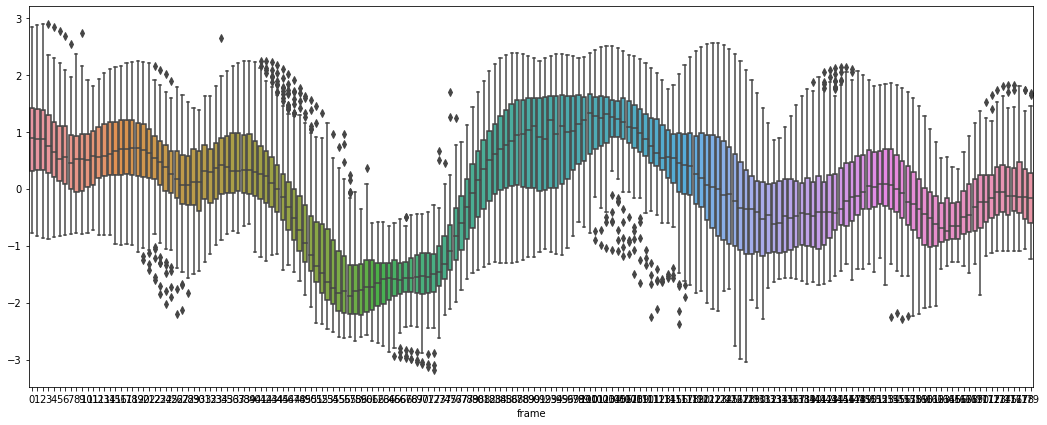

In [41]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features_std.T[:, :180]))

plt.xlabel("frame")

plt.show()

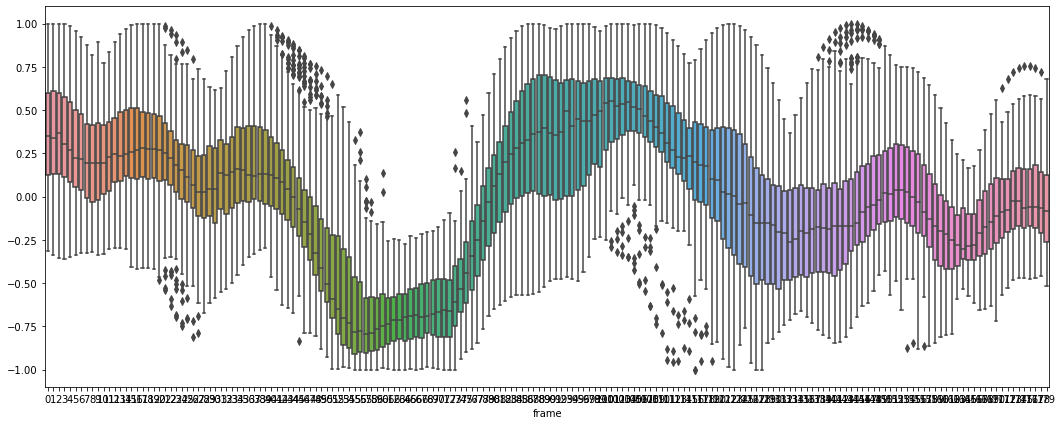

In [47]:
plt.figure(figsize = (18,7))

sns.boxplot(data = pd.DataFrame(features_norm.T[:, :180]))

plt.xlabel("frame")

plt.show()